In [ ]:
pip install gym-trading-env

In [ ]:
import gym_trading_env


In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd


In [ ]:
import yfinance as yf


In [ ]:
data = yf.download("NVDA", start="2022-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
hdfc=yf.download("HDFCBANK.NS", start="2024-11-01", end="2024-12-31")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install gymnasium numpy pandas yfinance

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

class StockMarketEnv(gym.Env):
    """
    Custom Environment for Stock Trading.
    """
    metadata = {"render_modes": ["human"]}

    def __init__(self, stock_data: pd.DataFrame, initial_balance=100000):
        super().__init__()

        # Validate and load stock data
        if "Close" not in stock_data.columns:
            raise ValueError("Stock data must contain a 'Close' column.")
        self.stock_data = stock_data.reset_index(drop=True)
        self.n_steps = len(stock_data)

        # Initialize parameters
        self.initial_balance = initial_balance
        self.current_balance = initial_balance
        self.current_step = 0
        self.total_shares = 0
        self.portfolio_value = initial_balance

        # Action space: [0 = Hold, 1 = Buy, 2 = Sell]
        self.action_space = spaces.Discrete(3)

        # Observation space: [current_price, balance, shares held, portfolio value]
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(4,), dtype=np.float32
        )

    def reset(self):
        """
        Resets the environment to its initial state.
        """
        self.current_balance = self.initial_balance
        self.current_step = 0
        self.total_shares = 0
        self.portfolio_value = self.initial_balance
        return self._get_obs(), {}

    def _get_obs(self):
        """
        Returns the current observation: [current_price, balance, shares held, portfolio value].
        """
        current_price = self.stock_data.loc[self.current_step, "Close"]
        return np.array([
            float(current_price), float(self.current_balance), float(self.total_shares), float(self.portfolio_value)
        ], dtype=np.float32)

    def step(self, action):
        """
        Executes the given action in the environment.

        Action: 0 = Hold, 1 = Buy, 2 = Sell
        """
        current_price = self.stock_data.loc[self.current_step, "Close"]

        # Execute action
        if action == 1:  # Buy
            shares_to_buy = self.current_balance // current_price
            self.current_balance -= shares_to_buy * current_price
            self.total_shares += shares_to_buy
        elif action == 2:  # Sell
            self.current_balance += self.total_shares * current_price
            self.total_shares = 0

        # Update portfolio value
        self.portfolio_value = self.current_balance + self.total_shares * current_price

        # Move to the next step
        self.current_step += 1

        # Calculate reward
        reward = self.portfolio_value - self.initial_balance

        # Check if the episode is done
        done = self.current_step >= self.n_steps - 1

        return self._get_obs(), reward, done, False, {}

    def render(self, mode="human"):
        """
        Renders the current state of the environment.
        """
        current_price = self.stock_data.loc[self.current_step, "Close"]
        print(f"Step: {self.current_step}")
        print(f"Price: {current_price}")
        print(f"Balance: {self.current_balance}")
        print(f"Shares: {self.total_shares}")
        print(f"Portfolio Value: {self.portfolio_value}")

    def close(self):
        """
        Cleans up the environment (if necessary).
        """
        pass

# Testing the environment
import yfinance as yf

# Download stock data for HDFC Bank
hdfc = yf.download("HDFCBANK.NS", start="2024-11-01", end="2024-12-31")

# Initialize the environment
env = StockMarketEnv(stock_data=hdfc, initial_balance=100000)

# Reset the environment
obs, info = env.reset()

# Simulate the environment with random actions
done = False
while not done:
    action = env.action_space.sample()  # Random action (0 = Hold, 1 = Buy, 2 = Sell)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

# Close the environment
env.close()


[*********************100%***********************]  1 of 1 completed
<ipython-input-40-f880b6ed024f>:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(current_price), float(self.current_balance), float(self.total_shares), float(self.portfolio_value)


Step: 1
Price: Ticker
HDFCBANK.NS    1714.099976
Name: 1, dtype: float64
Balance: 100000
Shares: 0
Portfolio Value: Ticker
HDFCBANK.NS    100000.0
Name: 0, dtype: float64
Step: 2
Price: Ticker
HDFCBANK.NS    1757.849976
Name: 2, dtype: float64
Balance: Ticker
HDFCBANK.NS    100000.0
Name: 1, dtype: float64
Shares: 0
Portfolio Value: Ticker
HDFCBANK.NS    100000.0
Name: 1, dtype: float64
Step: 3
Price: Ticker
HDFCBANK.NS    1755.25
Name: 3, dtype: float64
Balance: Ticker
HDFCBANK.NS    100000.0
Name: 1, dtype: float64
Shares: 0
Portfolio Value: Ticker
HDFCBANK.NS    100000.0
dtype: float64
Step: 4
Price: Ticker
HDFCBANK.NS    1746.550049
Name: 4, dtype: float64
Balance: Ticker
HDFCBANK.NS    100000.0
Name: 1, dtype: float64
Shares: 0
Portfolio Value: Ticker
HDFCBANK.NS    100000.0
dtype: float64
Step: 5
Price: Ticker
HDFCBANK.NS    1754.449951
Name: 5, dtype: float64
Balance: Ticker
HDFCBANK.NS    100000.0
Name: 1, dtype: float64
Shares: 0
Portfolio Value: Ticker
HDFCBANK.NS    100000.0

In [ ]:
import yfinance as yf
data = yf.download('HDFCBANK.NS', start='2020-01-01', end='2024-01-01')  # Example for HDFC stock


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install stable_baselines3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class StockMarketEnv(gym.Env):
    """
    Custom Environment for Stock Trading.
    """
    metadata = {"render_modes": ["human"]}

    def __init__(self, stock_data: pd.DataFrame, initial_balance=100000):
        super().__init__()

        # Validate and load stock data
        if "Close" not in stock_data.columns:
            raise ValueError("Stock data must contain a 'Close' column.")
        self.stock_data = stock_data.reset_index(drop=True)
        self.n_steps = len(stock_data)

        # Initialize parameters
        self.initial_balance = initial_balance
        self.current_balance = initial_balance
        self.current_step = 0
        self.total_shares = 0
        self.portfolio_value = initial_balance

        # Action space: [0 = Hold, 1 = Buy, 2 = Sell]
        self.action_space = spaces.Discrete(3)

        # Observation space: [current_price, balance, shares held, portfolio value]
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(4,), dtype=np.float32
        )

    def reset(self, seed=None, options=None):
        """
        Resets the environment to its initial state.
        """
        # Seed the environment's random number generator
        super().reset(seed=seed)

        self.current_balance = self.initial_balance
        self.current_step = 0
        self.total_shares = 0
        self.portfolio_value = self.initial_balance
        return self._get_obs(), {}


    def _get_obs(self):
        current_price = self.stock_data.loc[self.current_step, "Close"]
        if isinstance(current_price, pd.Series):
         current_price = current_price.iloc[0]

        return np.array([
            float(current_price),
            float(self.current_balance),
            float(self.total_shares),
            float(self.portfolio_value)
        ], dtype=np.float32)

    def step(self, action):
        current_price = self.stock_data.loc[self.current_step, "Close"]
        if isinstance(current_price, pd.Series):
         current_price = current_price.iloc[0]

        if action == 1:  # Buy
         shares_to_buy = self.current_balance // current_price
         self.current_balance -= shares_to_buy * current_price
         self.total_shares += shares_to_buy
        elif action == 2:  # Sell
         self.current_balance += self.total_shares * current_price
         self.total_shares = 0

        self.portfolio_value = self.current_balance + self.total_shares * current_price
        self.current_step += 1
        reward = self.portfolio_value - self.initial_balance
        done = self.current_step >= self.n_steps - 1
        info = {"portfolio_value": float(self.portfolio_value)}

        return self._get_obs(), reward, done, False, info

    def render(self, mode="human"):
        """
        Renders the current state of the environment.
        """
        current_price = self.stock_data.loc[self.current_step, "Close"]
        print(f"Step: {self.current_step}")
        print(f"Price: {current_price}")
        print(f"Balance: {self.current_balance}")
        print(f"Shares: {self.total_shares}")
        print(f"Portfolio Value: {self.portfolio_value}")

    def close(self):
        """
        Cleans up the environment (if necessary).
        """
        pass


In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
import yfinance as yf

# Load stock data
data = yf.download("HDFCBANK.NS", start="2020-01-01", end="2024-01-01")

# Wrap the environment
env = make_vec_env(lambda: StockMarketEnv(stock_data=data), n_envs=1)

# Initialize the DQN model
model = DQN("MlpPolicy", env, verbose=1, learning_rate=0.001, buffer_size=5000)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("dqn_stock_trading")

# Load the trained model
model = DQN.load("dqn_stock_trading")

# Test the trained model
obs = env.reset()
done = False

while not done:
    # Predict the action
    action, _ = model.predict(obs)

    # Take a step in the environment
    obs, reward, done, info = env.step(action)

    # Render the environment
    env.render()

print("Simulation complete")


[*********************100%***********************]  1 of 1 completed


Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 991      |
|    ep_rew_mean      | 2.3e+07  |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 406      |
|    time_elapsed     | 9        |
|    total_timesteps  | 3964     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.67e+04 |
|    n_updates        | 965      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 991      |
|    ep_rew_mean      | 1.8e+07  |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 484      |
|    time_elapsed     | 16       |
|    total_timesteps  | 7928     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.48e+04 |
|  

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Simulation complete


FINAL VERSION OF Base model

In [ ]:
pip install shimmy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
<ipython-input-47-8753d112cdbd>:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(price)
<ipython-input-47-8753d112cdbd>:75: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  previous_price = float(self.stock_data.iloc[self.current_step - 1]["Close"])


Streaming output truncated to the last 5000 lines.

Step: 452
Price: $146.55
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 453
Price: $148.76
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 454
Price: $149.26
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 455
Price: $149.48
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 456
Price: $148.69
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 457
Price: $148.64
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 458
Price: $149.32
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 459
Price: $148.85
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Step: 460
Price: $152.57
Action: HOLD
Portfolio Value: $93864.96
Cash Balance: $93864.96
Shares Held: 0

Ste

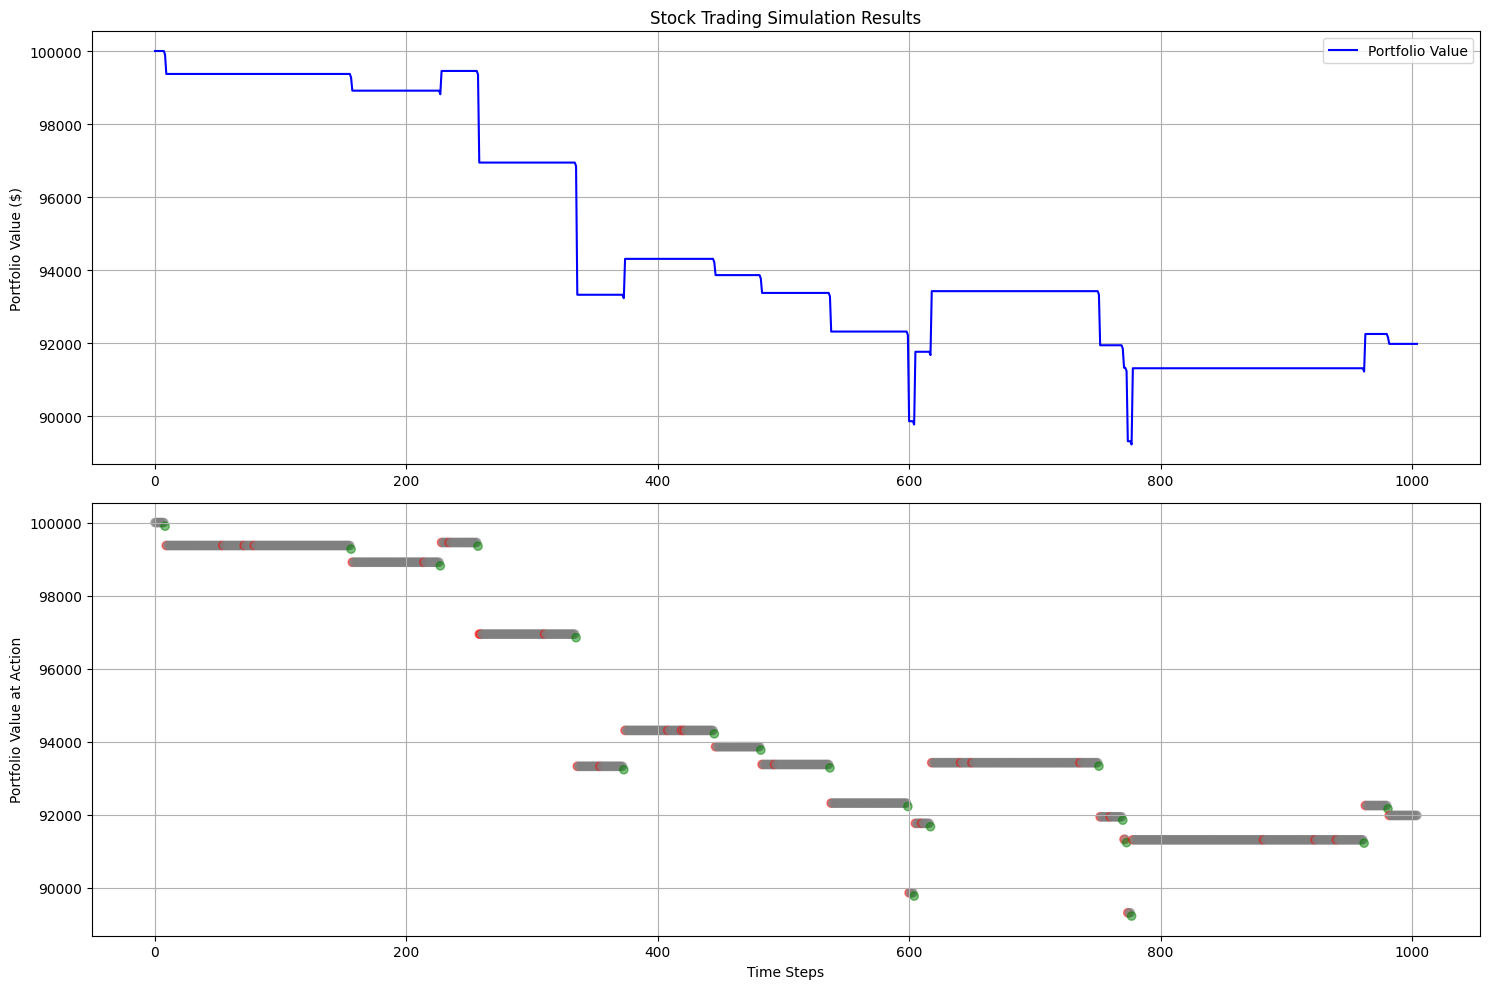


Trading Summary:
Initial Portfolio Value: $100000.00
Final Portfolio Value: $91981.95
Total Return: -8.02%


In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
import yfinance as yf
from typing import Optional, Union, Dict, Any


class StockMarketEnv(gym.Env):
    """
    Custom Environment for Stock Trading using Deep Q-Learning.
    """
    metadata = {"render_modes": ["human"]}

    def __init__(self, stock_data: pd.DataFrame, initial_balance=100000):
        super().__init__()

        if "Close" not in stock_data.columns:
            raise ValueError("Stock data must contain a 'Close' column.")

        self.stock_data = stock_data.reset_index(drop=True)
        self.n_steps = len(stock_data)

        # Initialize parameters
        self.initial_balance = initial_balance
        self.current_balance = initial_balance
        self.current_step = 0
        self.total_shares = 0
        self.portfolio_value = initial_balance
        self.trading_cost = 0.001  # 0.1% trading cost
        self.history = []  # Track trading history

        # Action space: [0 = Hold, 1 = Buy, 2 = Sell]
        self.action_space = spaces.Discrete(3)

        # Observation space: [current_price, balance, shares held, portfolio value, daily_return]
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32
        )

    def _get_current_price(self) -> float:
        """Safely get the current price as a float."""
        price = self.stock_data.iloc[self.current_step]["Close"]
        return float(price)

    def reset(
        self,
        *,
        seed: Optional[int] = None,
        options: Optional[Dict[str, Any]] = None,
    ) -> Union[np.ndarray, tuple[np.ndarray, dict]]:
        """Reset the environment to initial state."""
        super().reset(seed=seed)
        self.current_balance = self.initial_balance
        self.current_step = 0
        self.total_shares = 0
        self.portfolio_value = self.initial_balance
        self.history = []

        observation = self._get_obs()
        info = {}

        try:
            return observation, info
        except Exception:
            return observation

    def _get_obs(self):
        current_price = self._get_current_price()

        # Calculate daily return
        if self.current_step > 0:
            previous_price = float(self.stock_data.iloc[self.current_step - 1]["Close"])
            daily_return = (current_price - previous_price) / previous_price
        else:
            daily_return = 0.0

        return np.array([
            current_price,
            self.current_balance,
            self.total_shares,
            self.portfolio_value,
            daily_return
        ], dtype=np.float32)

    def step(self, action):
        # Record state before action
        current_price = self._get_current_price()
        previous_portfolio_value = self.portfolio_value

        # Execute action
        action_taken = "HOLD"
        shares_traded = 0

        if action == 1:  # Buy
            max_shares = self.current_balance // current_price
            shares_to_buy = max_shares
            transaction_cost = shares_to_buy * current_price * self.trading_cost

            if shares_to_buy > 0:
                self.current_balance -= (shares_to_buy * current_price + transaction_cost)
                self.total_shares += shares_to_buy
                action_taken = "BUY"
                shares_traded = shares_to_buy

        elif action == 2:  # Sell
            if self.total_shares > 0:
                transaction_cost = self.total_shares * current_price * self.trading_cost
                self.current_balance += (self.total_shares * current_price - transaction_cost)
                shares_traded = self.total_shares
                self.total_shares = 0
                action_taken = "SELL"

        # Update portfolio value
        self.portfolio_value = self.current_balance + (self.total_shares * current_price)

        # Calculate reward (portfolio return with penalty for trading)
        reward = (self.portfolio_value - previous_portfolio_value) / previous_portfolio_value

        # Record trading history
        self.history.append({
            'step': self.current_step,
            'price': current_price,
            'action': action_taken,
            'shares_traded': shares_traded,
            'portfolio_value': self.portfolio_value,
            'balance': self.current_balance,
            'shares_held': self.total_shares
        })

        # Move to next step
        self.current_step += 1

        # Check if episode is done
        done = self.current_step >= self.n_steps - 1

        info = {
            "portfolio_value": float(self.portfolio_value),
            "total_shares": self.total_shares,
            "current_balance": self.current_balance,
            "action_taken": action_taken
        }

        try:
            return self._get_obs(), reward, done, False, info
        except Exception:
            return self._get_obs(), reward, done, info

    def render(self, mode="human"):
        """Render the current state of the environment."""
        if not self.history:
            return

        current_state = self.history[-1]
        action_color = {
            'BUY': '\033[92m',  # Green
            'SELL': '\033[91m', # Red
            'HOLD': '\033[94m'  # Blue
        }
        end_color = '\033[0m'

        print("\n" + "="*50)
        print(f"Step: {current_state['step']}")
        print(f"Price: ${current_state['price']:.2f}")
        print(f"Action: {action_color[current_state['action']]}{current_state['action']}{end_color}")
        if current_state['shares_traded'] > 0:
            print(f"Shares Traded: {current_state['shares_traded']}")
        print(f"Portfolio Value: ${current_state['portfolio_value']:.2f}")
        print(f"Cash Balance: ${current_state['balance']:.2f}")
        print(f"Shares Held: {current_state['shares_held']}")
        print("="*50)


def train_model(stock_data, initial_balance=100000, total_timesteps=10000):
    """Train the DQN model on the stock trading environment."""
    env = StockMarketEnv(stock_data=stock_data, initial_balance=initial_balance)

    model = DQN(
        "MlpPolicy",
        env,
        verbose=1,
        learning_rate=0.001,
        buffer_size=5000,
        learning_starts=1000,
        exploration_fraction=0.2,
        exploration_final_eps=0.05
    )

    model.learn(total_timesteps=total_timesteps)
    return model, env

def test_model(model, env, initial_balance=100000):
    """Test the trained model and visualize results."""
    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]

    done = False
    portfolio_values = []
    actions_taken = []

    while not done:
        action, _ = model.predict(obs)
        step_result = env.step(action)

        if len(step_result) == 5:
            obs, reward, done, _, info = step_result
        else:
            obs, reward, done, info = step_result

        portfolio_values.append(info['portfolio_value'])
        actions_taken.append(action)

        env.render()

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Portfolio value plot
    ax1.plot(portfolio_values, label="Portfolio Value", color='blue')
    ax1.set_title("Stock Trading Simulation Results")
    ax1.set_ylabel("Portfolio Value ($)")
    ax1.legend()
    ax1.grid(True)

    # Trading actions plot
    action_colors = ['gray', 'green', 'red']  # Hold, Buy, Sell
    scatter_x = []
    scatter_y = []
    scatter_colors = []

    for i, action in enumerate(actions_taken):
        scatter_x.append(i)
        scatter_y.append(portfolio_values[i])
        scatter_colors.append(action_colors[action])

    ax2.scatter(scatter_x, scatter_y, c=scatter_colors, alpha=0.5)
    ax2.set_xlabel("Time Steps")
    ax2.set_ylabel("Portfolio Value at Action")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Print summary
    initial_value = portfolio_values[0]
    final_value = portfolio_values[-1]
    returns = (final_value - initial_value) / initial_value * 100

    print("\nTrading Summary:")
    print(f"Initial Portfolio Value: ${initial_value:.2f}")
    print(f"Final Portfolio Value: ${final_value:.2f}")
    print(f"Total Return: {returns:.2f}%")

    return portfolio_values, actions_taken

# Example usage
if __name__ == "__main__":
    # Download stock data
    data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")

    # Train model
    model, env = train_model(data)

    # Test and visualize results
    portfolio_values, actions = test_model(model, env)

In [ ]:
model.save("dqn_stock_model")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
loaded_model = DQN.load("dqn_stock_model")

In [ ]:
obs = env.reset()
if isinstance(obs, tuple):  # Check if obs is a tuple
    obs = obs[0]         # Extract the observation array if it is
action, _ = loaded_model.predict(obs)

<ipython-input-47-8753d112cdbd>:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(price)


In [ ]:
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed



Step: 0
Price: $75.09
Action: HOLD
Portfolio Value: $100000.00
Cash Balance: $100000.00
Shares Held: 0

Step: 1
Price: $74.36
Action: BUY
Shares Traded: 1344.0
Portfolio Value: $99900.06
Cash Balance: $-36.41
Shares Held: 1344.0

Step: 2
Price: $74.95
Action: SELL
Shares Traded: 1344.0
Portfolio Value: $100595.65
Cash Balance: $100595.65
Shares Held: 0

Step: 3
Price: $74.60
Action: HOLD
Portfolio Value: $100595.65
Cash Balance: $100595.65
Shares Held: 0

Step: 4
Price: $75.80
Action: HOLD
Portfolio Value: $100595.65
Cash Balance: $100595.65
Shares Held: 0

Step: 5
Price: $77.41
Action: HOLD
Portfolio Value: $100595.65
Cash Balance: $100595.65
Shares Held: 0

Step: 6
Price: $77.58
Action: BUY
Shares Traded: 1296.0
Portfolio Value: $100495.10
Cash Balance: $-51.81
Shares Held: 1296.0

Step: 7
Price: $79.24
Action: SELL
Shares Traded: 1296.0
Portfolio Value: $102540.53
Cash Balance: $102540.53
Shares Held: 0

Step: 8
Price: $78.17
Action: HOLD
Portfolio Value: $102540.53
Cash Balance: $

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-8753d112cdbd>:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(price)
<ipython-input-47-8753d112cdbd>:75: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  previous_price = float(self.stock_data.iloc[self.current_step - 1]["Close"])


Streaming output truncated to the last 5000 lines.
Step: 451
Price: $144.84
Action: HOLD
Portfolio Value: $103522.20
Cash Balance: $103522.20
Shares Held: 0

Step: 452
Price: $146.55
Action: BUY
Shares Traded: 706.0
Portfolio Value: $103418.74
Cash Balance: $-45.57
Shares Held: 706.0

Step: 453
Price: $148.76
Action: SELL
Shares Traded: 706.0
Portfolio Value: $104873.97
Cash Balance: $104873.97
Shares Held: 0

Step: 454
Price: $149.26
Action: HOLD
Portfolio Value: $104873.97
Cash Balance: $104873.97
Shares Held: 0

Step: 455
Price: $149.48
Action: HOLD
Portfolio Value: $104873.97
Cash Balance: $104873.97
Shares Held: 0

Step: 456
Price: $148.69
Action: HOLD
Portfolio Value: $104873.97
Cash Balance: $104873.97
Shares Held: 0

Step: 457
Price: $148.64
Action: HOLD
Portfolio Value: $104873.97
Cash Balance: $104873.97
Shares Held: 0

Step: 458
Price: $149.32
Action: HOLD
Portfolio Value: $104873.97
Cash Balance: $104873.97
Shares Held: 0

Step: 459
Price: $148.85
Action: HOLD
Portfolio Val

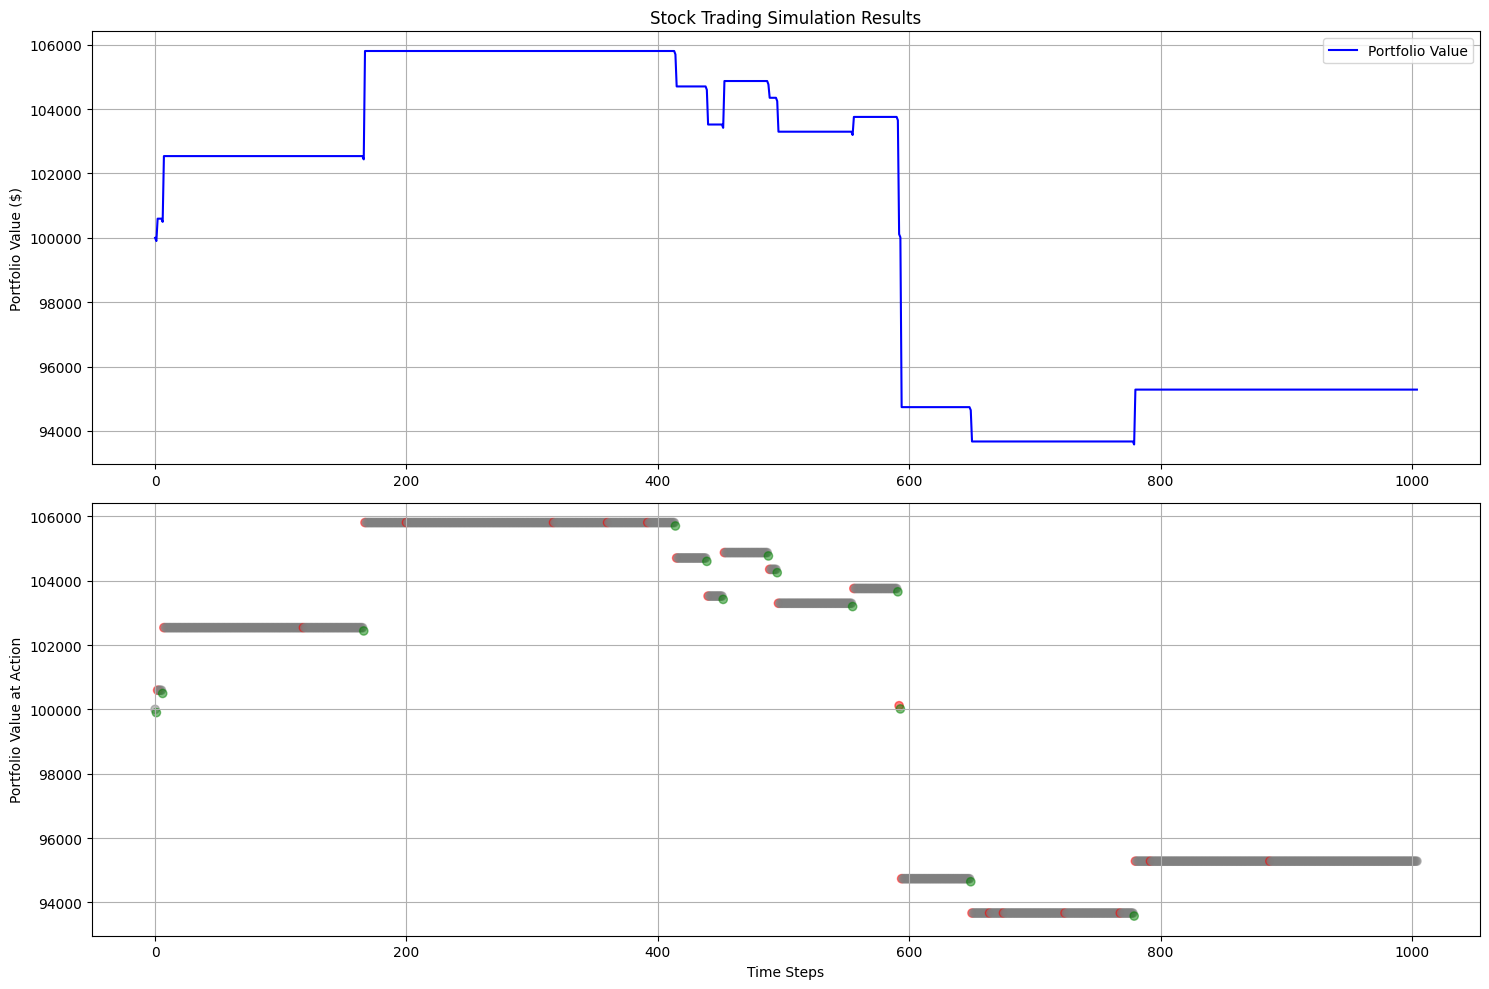


Trading Summary:
Initial Portfolio Value: $100000.00
Final Portfolio Value: $95282.31
Total Return: -4.72%


In [ ]:
 obs = env.reset()
 portfolio_values, actions = test_model(loaded_model, env)

Testing with zero randomness

In [ ]:
loaded_model = DQN.load("dqn_stock_model")


In [ ]:
obs = env.reset()
if isinstance(obs, tuple):  # Check if obs is a tuple
    obs = obs[0]         # Extract the observation array if it is
action, _ = loaded_model.predict(obs, deterministic=True)

<ipython-input-47-8753d112cdbd>:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(price)


<ipython-input-47-8753d112cdbd>:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(price)
<ipython-input-47-8753d112cdbd>:75: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  previous_price = float(self.stock_data.iloc[self.current_step - 1]["Close"])


Streaming output truncated to the last 5000 lines.

Step: 452
Price: $146.55
Action: HOLD
Portfolio Value: $190703.65
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 453
Price: $148.76
Action: HOLD
Portfolio Value: $193581.06
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 454
Price: $149.26
Action: HOLD
Portfolio Value: $194232.06
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 455
Price: $149.48
Action: HOLD
Portfolio Value: $194518.50
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 456
Price: $148.69
Action: HOLD
Portfolio Value: $193489.93
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 457
Price: $148.64
Action: HOLD
Portfolio Value: $193424.83
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 458
Price: $149.32
Action: HOLD
Portfolio Value: $194310.20
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 459
Price: $148.85
Action: HOLD
Portfolio Value: $193698.25
Cash Balance: $-104.45
Shares Held: 1302.0

Step: 460
Price: $152.57
Action: HOLD
Portfolio Value: $198541.70
Ca

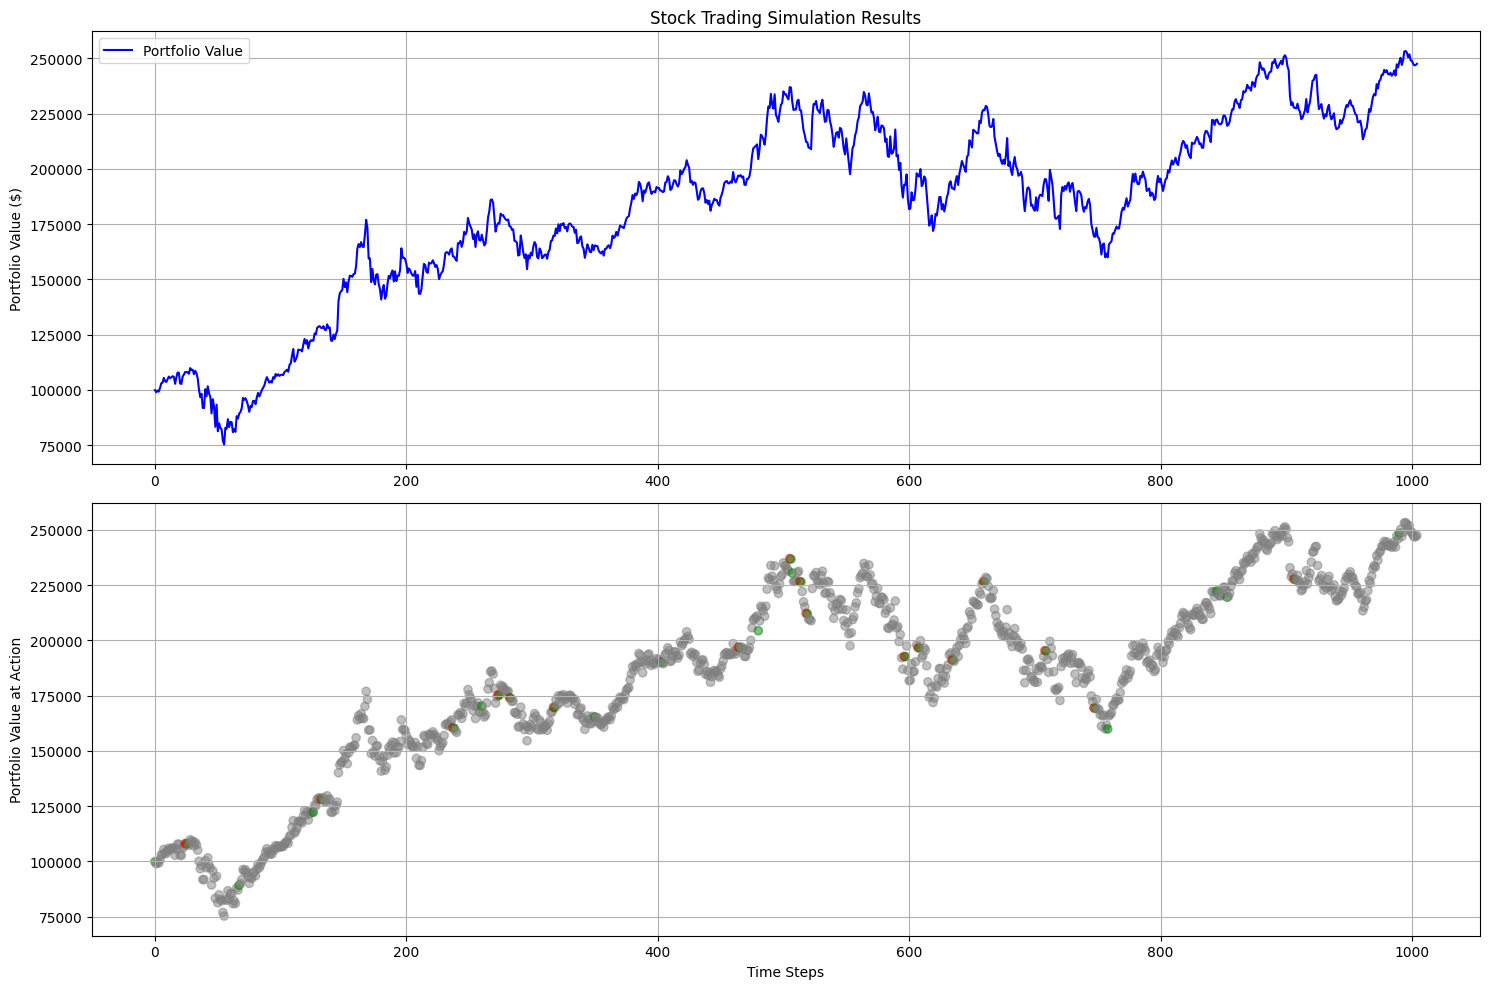


Trading Summary:
Initial Portfolio Value: $99900.06
Final Portfolio Value: $247503.86
Total Return: 147.75%


In [ ]:
portfolio_values, actions = test_model(loaded_model, env)